![ine-divider](https://user-images.githubusercontent.com/7065401/92672068-398e8080-f2ee-11ea-82d6-ad53f7feb5c0.png)
<hr>

### Secure RESTful APIs using Python

# Refactoring a library to micro-services

For this project, we use a version of the small `fractal` package that is used in a number of other INE courses.  We would like to provide all of these capabilities as a collection of small servers that might operate independently, each potentially running on different nodes of a cluster.  All the code is in files within the `fractal/` subdirectory.

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Part 1

**Full-canvas fractals**

The fractal provided in the `fractal.sierpiński` submodule, `gasket` creates a *canvas* that may be rendered using the `visualize()` function.  We would like to make this into a service, with a route `/gasket`, that will accept the same parameters as the base function, and return a PNG image of the rendered canvas.  For example, the local library might call this:

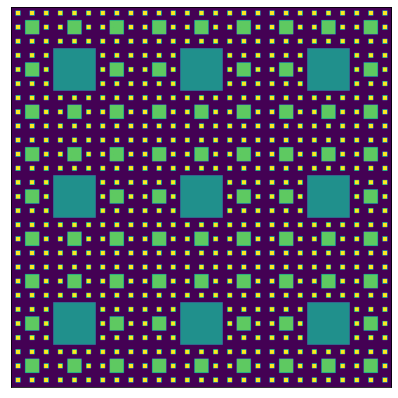

In [1]:
from fractal.visualize import visualize
from fractal.sierpiński import gasket
visualize(gasket(N=3, pixels=243))

Accessing the service might resemble this:

```python
import requests
from IPython.display import Image
resp = requests.get("http://localhost:5010/gasket?pixels=243&N=4&cmap=cividis")
Image(resp.content)
```
<img src="gasket.png" width="400px"/>

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

## Part 2

**Complex-point fractals**

The submodules `fractal.mandelbrot` and `fractal.julia` work somewhat differently than the Sierpiński gasket.  These function simply determine an "escape" orbit for a single complex point.  Let's implement another server that supports these routes, including allowing passing any optional parameters.

In [2]:
from fractal.mandelbrot import mandelbrot
mandelbrot

<function fractal.mandelbrot.mandelbrot(z0: complex, orbits: int = 255) -> int>

In [3]:
from fractal.visualize import make_canvas
make_canvas

<function fractal.visualize.make_canvas(fn: collections.abc.Callable, x: float, y: float, size: float, pixels: int, kws: dict = {}) -> numpy.ndarray>

Accessing this service might resemble:
    
```python
import requests
from IPython.display import Image
resp = requests.get("http://localhost:5011/mandelbrot?x=-1&y=0&size=0.65&pixels=400")
Image(resp.content)
```
<img src="mandelbrot.png" width="400px"/>

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)